The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


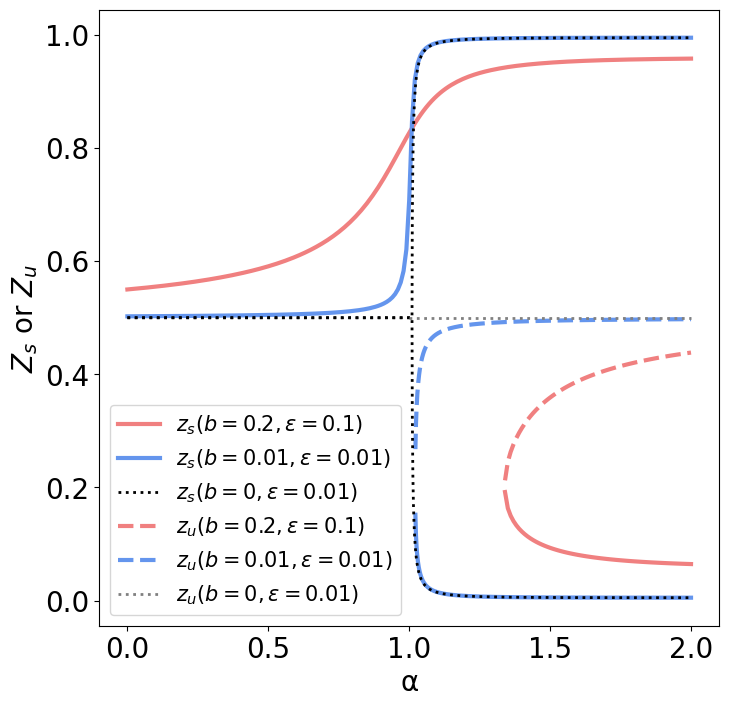

In [1]:
import numpy as np
from scipy.optimize import brentq
import matplotlib.pyplot as plt

# Rの関数をPythonで定義
def f(z, a, epsilon=0.1):
    if epsilon == 0.01:
        return 0.99 * z**a / (z**a + (1 - z)**a) + 0.005
    else:
        return 0.9 * z**a / (z**a + (1 - z)**a) + 0.05

def g(z, a, b=0.01, epsilon=0.1):
    return (1 + b * (1 - f(z, a, epsilon))) * f(z, a, epsilon)

def h(z, a, b, epsilon=0.1):
    return g(z, a, b, epsilon) - z

# alphasとzの値を計算する関数
def compute_zs(alphas, b, z_range, epsilon=0.1):
    zs = np.zeros_like(alphas)
    for i, a in enumerate(alphas):
        zs[i] = brentq(h, z_range[0], z_range[1], args=(a, b, epsilon))
    return zs

# alphasの範囲を定義
alphas_b02 = np.arange(0, 2.01, 0.01)
alphas_b02_2 = np.arange(1.34, 2.01, 0.01)
alphas_b001 = np.arange(0, 2.01, 0.01)
alphas_b001_2 = np.arange(1.022, 2.001, 0.001)
alphas_b0 = np.arange(0, 2.001, 0.001)

# zの値を計算
z_s_b02 = compute_zs(alphas_b02, 0.2, (0.5, 0.99))
z_s_b02_2 = compute_zs(alphas_b02_2, 0.2, (0.01, 0.2))
z_u_b02_2 = compute_zs(alphas_b02_2, 0.2, (0.2, 0.8), epsilon=0.1)
z_s_b001 = compute_zs(alphas_b001, 0.01, (0.5, 0.999), epsilon=0.01)
z_s_b001_2 = compute_zs(alphas_b001_2, 0.01, (0.001, 0.2), epsilon=0.01)
z_u_b001_2 = compute_zs(alphas_b001_2, 0.01, (0.2, 0.5), epsilon=0.01)
z_s_b0 = compute_zs(alphas_b0, 0.0, (0.0, 0.999), epsilon=0.01)

# プロットの準備
plt.figure(figsize=(8, 8))
plt.plot(alphas_b02, z_s_b02, label=r"$z_s(b=0.2, \epsilon=0.1)$", linewidth=3, color='lightcoral')
plt.plot(alphas_b001, z_s_b001, label=r"$z_s(b=0.01, \epsilon=0.01)$", linewidth=3, linestyle='-', color='cornflowerblue')
plt.plot(alphas_b02_2, z_s_b02_2, linewidth=3, linestyle='-', color='lightcoral')
plt.plot(alphas_b0, z_s_b0, label=r"$z_s(b=0, \epsilon=0.01)$", linewidth=2, linestyle=':', color='k')
plt.plot(alphas_b02_2, z_u_b02_2, label=r"$z_u(b=0.2, \epsilon=0.1)$", linewidth=3, linestyle='--', color='lightcoral')
plt.plot(alphas_b001_2, z_s_b001_2,  linewidth=3, linestyle='-', color='cornflowerblue')
plt.plot(alphas_b001_2, z_u_b001_2, label=r"$z_u(b=0.01, \epsilon=0.01)$", linewidth=3, linestyle='--', color='cornflowerblue')
plt.plot(alphas_b0, 1-z_s_b0, linewidth=2, linestyle=':', color='k')
plt.plot([1, 2], [0.5, 0.5], linewidth=2, linestyle=':', color='gray', label=r"$z_u(b=0, \epsilon=0.01)$") # y=1/2の水平線を追加

plt.xticks(np.arange(0, 2.1, 0.5), fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel("α", fontsize=20)
plt.ylabel(r"$Z_s$ or $Z_u$", fontsize=20)
# plt.title("Plot of z values", fontsize=16)
plt.legend(loc='lower left', fontsize=15)
plt.savefig("fig/fig2.eps")
# plt.grid(True)
plt.show()
